# U1B model: SI cross section check

The idea is to do a firts DM random scand

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

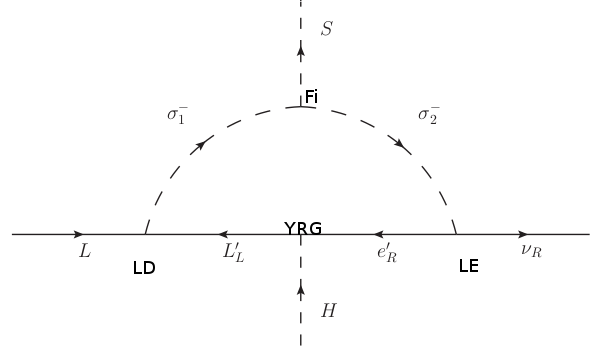

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

Run diccionary 

In [4]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 20

for i in range(0,Num):
    
    #opend the dictionary
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    #Benchmark point i-esimo    
    Lambda2 = -np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #L2 conj[bi].bi.conj[bi].bi
    Lambda3 = np.exp(np.random.uniform(np.log(1.*10**(-5)),np.log(10**(-1)))) #L3 conj[bi].bi.conj[H].H
    Lambda4 = -np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #L4 conj[bj].bj.conj[bj].bj
    Lambda5 = -np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #L5 conj[bj].bj.conj[H].H 
    muj = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(9)))) #muj conj[bj].bj   
    YA1 = np.exp(np.random.uniform(np.log(1.*10**(-5)),np.log(10**(0)))) #YA1 conj[bi].x3.x4
    YA2 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YA2 conj[bj].x3.x4
    YB1 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YB1 bi.x5.x6
    YB2 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YB2 bj.x5.x6
    YC1 = np.exp(np.random.uniform(np.log(1.*10**(-2)),np.log(10**(0)))) #YC1 conj[bi].lp.lpp : control the Fvv mass
    YC2 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YC2 conj[bj].lp.lpp 
    YRG = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YRG conj[H].x5.lp 
    YRH = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YRH H.x6.lpp
    vx = np.random.uniform(100,12000) # VEV of Phi
    g1p = np.exp(np.random.uniform(np.log(1.*10**(-6)),np.log(10**(0)))) #U1B coupling
    
    Fi11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #Fi conj[S1].S2.conj[bi]
    Fi12 = 0.0
    Fi21 = 0.0
    Fi22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    
    Fj11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) #Fj conj[S1].S2.conj[bj]
    Fj12 = 0.0
    Fj21 = 0.0
    Fj22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1))))
    
    L611 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) #L6 conj[S1].S1.conj[H].H
    L612 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L621 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L622 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    
    L711 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) #L7 conj[S2].S2.conj[H].H
    L712 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L721 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L722 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    
    M111 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(10)))) #m1 conj[S1].S1
    M112 = 0. 
    M121 = 0. 
    M122 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(10)))) 
    
    M211 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(10)))) #m2 conj[S2].S2
    M212 = 0. 
    M221 = 0. 
    M222 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(10)))) 
    
    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%Lambda2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # Lambda3INPUT'%Lambda3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # Lambda4INPUT'%Lambda4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # Lambda5INPUT'%Lambda5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # mujINPUT'%muj   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[8]='%.6E    # YA2INPUT'%YA2
    xdict.blocks['MINPAR'].entries[9]='%.6E    # YB1INPUT'%YB1
    xdict.blocks['MINPAR'].entries[10]='%.6E    # YB2INPUT'%YB2 
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[12]='%.6E    # YC2INPUT'%YC2    
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[14]='%.6E    # YRHINPUT'%YRH
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    xdict.blocks['MINPAR'].entries[16]='%.6E    # g1pINPUT'%g1p

    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['FJIN'].entries[1,1]='%.6E    # Fj(1,1)'%Fj11
    xdict.blocks['FJIN'].entries[1,2]='%.6E    # Fj(1,2)'%Fj12
    xdict.blocks['FJIN'].entries[2,1]='%.6E    # Fj(2,1)'%Fj21
    xdict.blocks['FJIN'].entries[2,2]='%.6E    # Fj(2,2)'%Fj22
    
    xdict.blocks['L6IN'].entries[1,1]='%.6E    # lam6(1,1)'%L611
    xdict.blocks['L6IN'].entries[1,2]='%.6E    # lam6(1,2)'%L612
    xdict.blocks['L6IN'].entries[2,1]='%.6E    # lam6(2,1)'%L621
    xdict.blocks['L6IN'].entries[2,2]='%.6E    # lam6(2,2)'%L622
    
    xdict.blocks['L7IN'].entries[1,1]='%.6E    # lam7(1,1)'%L711
    xdict.blocks['L7IN'].entries[1,2]='%.6E    # lam7(1,2)'%L712
    xdict.blocks['L7IN'].entries[2,1]='%.6E    # lam7(2,1)'%L721
    xdict.blocks['L7IN'].entries[2,2]='%.6E    # lam7(2,2)'%L722
    
    xdict.blocks['M1IN'].entries[1,1]='%.6E    # m1(1,1)'%M111
    xdict.blocks['M1IN'].entries[1,2]='%.6E    # m1(1,2)'%M112
    xdict.blocks['M1IN'].entries[2,1]='%.6E    # m1(2,1)'%M121
    xdict.blocks['M1IN'].entries[2,2]='%.6E    # m1(2,2)'%M122
    
    xdict.blocks['M2IN'].entries[1,1]='%.6E    # m2(1,1)'%M211
    xdict.blocks['M2IN'].entries[1,2]='%.6E    # m2(1,2)'%M212
    xdict.blocks['M2IN'].entries[2,1]='%.6E    # m2(2,1)'%M221
    xdict.blocks['M2IN'].entries[2,2]='%.6E    # m2(2,2)'%M222

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 
    
    #run SPheno
    if (5.*g1p*vx) > 91.1887:
        spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
        so = subprocess.getoutput('cat SPheno.spc.U1B')
        #print("Mayor")
    
    else:
        spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1Blight LesHouches.in.U1B_low')    
        so = subprocess.getoutput('cat SPheno.spc.U1Blight')
        #print("Menor")
    
    MZp = eval(so.split('# VWm')[1].split()[1])

    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])

    mH2=eval(so.split('Block MASS')[1].split()[17])
    mH3=eval(so.split('Block MASS')[1].split()[21])
    mH4=eval(so.split('Block MASS')[1].split()[25])
    mH5=eval(so.split('Block MASS')[1].split()[29])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])

    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])

    #PMNS matrix 2018 to 3\sigma https://arxiv.org/abs/1708.01186
    k = NEUTRINO2018.nuexpvalues()
    mv1 = k['mv1']
    mv2 = k['mv2']
    mv3 = k['mv3']
    U11 = k['U11']
    U12 = k['U12']
    U13 = k['U13']
    U21 = k['U21']
    U22 = k['U22']
    U23 = k['U23']
    U31 = k['U31']
    U32 = k['U32']
    U33 = k['U33']
                             
    #Loop factors
    L1 = neutrino_analytic_v2.Lab(ZP22,ZP32,ZP42,ZP52,ZP24,ZP34,ZP44,ZP54,meD1,meD2,mH2,mH3,mH4,mH5,VL11,\
                                VL21,UL11,UL21)
    L2 = neutrino_analytic_v2.Lab(ZP23,ZP33,ZP43,ZP53,ZP25,ZP35,ZP45,ZP55,meD1,meD2,mH2,mH3,mH4,mH5,VL11,\
                                VL21,UL11,UL21)

    #Random free parameters and Mathematic rutine
    he12 = np.exp(np.random.uniform(np.log(1.*10**(-5)),np.log(10**(0))))
    he13 = np.exp(np.random.uniform(np.log(1.*10**(-5)),np.log(10**(0))))
    he22 = np.exp(np.random.uniform(np.log(1.*10**(-5)),np.log(10**(0))))
    he23 = np.exp(np.random.uniform(np.log(1.*10**(-5)),np.log(10**(0))))

    hd11 = -(1/L1)*(he23*mv2*U12 - he22*mv3*U13)/(he13*he22 - he12*he23)
    hd12 = -(1/L1)*(he23*mv2*U22 - he22*mv3*U23)/(he13*he22 - he12*he23)
    hd13 = -(1/L1)*(he23*mv2*U32 - he22*mv3*U33)/(he13*he22 - he12*he23)

    hd21 = +(1/L2)*(he13*mv2*U12 - he12*mv3*U13)/(he13*he22 - he12*he23)
    hd22 = +(1/L2)*(he13*mv2*U22 - he12*mv3*U23)/(he13*he22 - he12*he23)
    hd23 = +(1/L2)*(he13*mv2*U32 - he12*mv3*U33)/(he13*he22 - he12*he23)

    ######## RUN SECOND TIME ########
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%Lambda2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # Lambda3INPUT'%Lambda3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # Lambda4INPUT'%Lambda4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # Lambda5INPUT'%Lambda5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # mujINPUT'%muj   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[8]='%.6E    # YA2INPUT'%YA2
    xdict.blocks['MINPAR'].entries[9]='%.6E    # YB1INPUT'%YB1
    xdict.blocks['MINPAR'].entries[10]='%.6E    # YB2INPUT'%YB2 
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[12]='%.6E    # YC2INPUT'%YC2    
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[14]='%.6E    # YRHINPUT'%YRH
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    xdict.blocks['MINPAR'].entries[16]='%.6E    # g1pINPUT'%g1p

    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['FJIN'].entries[1,1]='%.6E    # Fj(1,1)'%Fj11
    xdict.blocks['FJIN'].entries[1,2]='%.6E    # Fj(1,2)'%Fj12
    xdict.blocks['FJIN'].entries[2,1]='%.6E    # Fj(2,1)'%Fj21
    xdict.blocks['FJIN'].entries[2,2]='%.6E    # Fj(2,2)'%Fj22
    
    xdict.blocks['L6IN'].entries[1,1]='%.6E    # lam6(1,1)'%L611
    xdict.blocks['L6IN'].entries[1,2]='%.6E    # lam6(1,2)'%L612
    xdict.blocks['L6IN'].entries[2,1]='%.6E    # lam6(2,1)'%L621
    xdict.blocks['L6IN'].entries[2,2]='%.6E    # lam6(2,2)'%L622
    
    xdict.blocks['L7IN'].entries[1,1]='%.6E    # lam7(1,1)'%L711
    xdict.blocks['L7IN'].entries[1,2]='%.6E    # lam7(1,2)'%L712
    xdict.blocks['L7IN'].entries[2,1]='%.6E    # lam7(2,1)'%L721
    xdict.blocks['L7IN'].entries[2,2]='%.6E    # lam7(2,2)'%L722
    
    xdict.blocks['M1IN'].entries[1,1]='%.6E    # m1(1,1)'%M111
    xdict.blocks['M1IN'].entries[1,2]='%.6E    # m1(1,2)'%M112
    xdict.blocks['M1IN'].entries[2,1]='%.6E    # m1(2,1)'%M121
    xdict.blocks['M1IN'].entries[2,2]='%.6E    # m1(2,2)'%M122
    
    xdict.blocks['M2IN'].entries[1,1]='%.6E    # m2(1,1)'%M211
    xdict.blocks['M2IN'].entries[1,2]='%.6E    # m2(1,2)'%M212
    xdict.blocks['M2IN'].entries[2,1]='%.6E    # m2(2,1)'%M221
    xdict.blocks['M2IN'].entries[2,2]='%.6E    # m2(2,2)'%M222

    xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%hd11
    xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%hd12
    xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%hd13
    xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%hd21
    xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%hd22
    xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%hd23

    xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%he12
    xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%he13
    xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%he22
    xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%he23

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 
    
    #run SPheno againt
    if (5.*g1p*vx) > 91.1887:
        spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
        so = subprocess.getoutput('cat SPheno.spc.U1B')
        #print("Mayor")
    
    else:
        spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1Blight LesHouches.in.U1B_low')   
        
        subprocess.getoutput('cp SPheno.spc.U1Blight SPheno.spc.U1B')
        
        so = subprocess.getoutput('cat SPheno.spc.U1Blight')
        #print("Menor")

    #take spheno output
    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
    
    mh1 = eval(so.split('#   PDG code')[1].split()[3])
    mh2 = eval(so.split('#   PDG code')[1].split()[7])
    mH2 = eval(so.split('Block MASS')[1].split()[17])
    mH3 = eval(so.split('Block MASS')[1].split()[21])
    mH4 = eval(so.split('Block MASS')[1].split()[25])
    mH5 = eval(so.split('Block MASS')[1].split()[29])
    mss = eval(so.split('Block MASS')[1].split()[33]) 
    MZ = eval(so.split('Block MASS')[1].split()[37])
    MZp = eval(so.split('# VWm')[1].split()[1])
    mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
    mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
    mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))
    
    if np.abs(np.abs(mnu2)-mv2)*100/mv2 > 10.: #bad re-construction
        continue
    
    if np.abs(np.abs(mnu3)-mv3)*100/mv3 > 10.: #bad re-construction
        continue
        
    if mh1 == 1.0: #bad higgs mass
        continue
    
    mchi = eval(so.split('# Fv_5')[1].split()[1])
    mFv = eval(so.split('# Fv_5')[1].split()[5])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])

    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])
    
    T = eval(so.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(so.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(so.split('Block SPhenoLowEnergy')[1].split()[17])
    meg = eval(so.split('Block FlavorKitLFV # lepton')[1].split()[4])
    g2mu = eval(so.split('Block SPhenoLowEnergy')[1].split()[27])
    
    #run micromegas.
    mo = subprocess.getoutput('~/Work/micromegas_5.0.4/U1B/./CalcOmega_with_Direct_Detection') #with_direct_detection
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    #print("i=",i,"Omega=",Omega)
    
    SIP = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    SDP = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    SIN = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    SDN = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    #WARNING
    #sv = eval(mo.split('annihilation cross section')[1].split()[0])
    sv = 1.0e-10
    
    x.append([Lambda2,Lambda3,Lambda4,Lambda5,muj,YA1,YA2,YB1,YB2,YC1,YC2,YRG,YRH,vx,g1p,Fi11,Fi12,Fi21,Fi22,Fj11,\
              Fj12,Fj21,Fj22,L611,L612,L621,L622,L711,L712,L721,L722,M111,M112,M121,M122,M211,M212,M221,M222,hd11,\
              hd12,hd13,hd21,hd22,hd23,he12,he13,he22,he23,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,\
              ZP45,ZP52,ZP53,ZP54,ZP55,mh1,mh2,mH2,mH3,mH4,mH5,mss,MZ,MZp,mnu1,mnu2,mnu3,mchi,mFv,meD1,meD2,VL11,\
              VL12,VL21,VL22,UL11,UL12,UL21,UL22,L1,L2,mv1,mv2,mv3,T,S,U,meg,g2mu,Omega,SIP,SDP,SIN,SDN,sv])

x=np.asarray(x)

xd=pd.DataFrame(x,columns=['Lambda2','Lambda3','Lambda4','Lambda5','muj','YA1','YA2','YB1','YB2','YC1','YC2','YRG',\
                           'YRH','vx','g1p','Fi11','Fi12','Fi21','Fi22','Fj11','Fj12','Fj21','Fj22','L611','L612',\
                           'L621','L622','L711','L712','L721','L722','M111','M112','M121','M122','M211','M212',\
                           'M221','M222','hd11','hd12','hd13','hd21','hd22','hd23','he12','he13','he22','he23',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44','ZP45',\
                           'ZP52','ZP53','ZP54','ZP55','mh1','mh2','mH2','mH3','mH4','mH5','mss','MZ','MZp','mnu1',\
                           'mnu2','mnu3','mchi','mFv','meD1','meD2','VL11','VL12','VL21','VL22','UL11','UL12',\
                           'UL21','UL22','L1','L2','mv1','mv2','mv3','T','S','U','meg','g2mu','Omega','SIP',\
                           'SDP','SIN','SDN','sv'])  
t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 55.47055220603943 s running 20 times


In [5]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [6]:
xd.shape

(7, 105)

### Z' mass

\begin{equation}
M_{Z^{'}} =Q_{\Phi}g^{'} v_\Phi =  5 g^{'} v_\Phi
\end{equation}

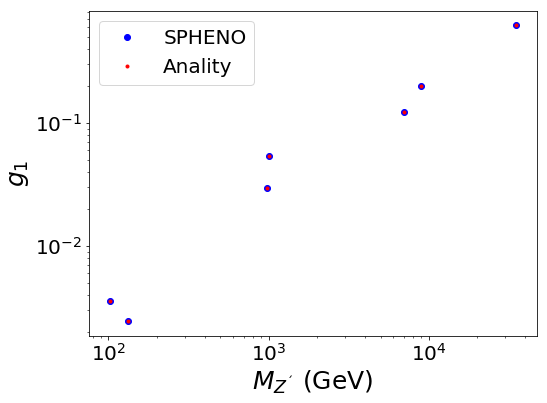

In [7]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MZp,xd.g1p,'bo',label='SPHENO')
#plt.loglog(xd.MZ,xd.g1p,'g.',label='SPHENO')

plt.loglog(5.*xd.g1p*xd.vx,xd.g1p,'r.',label='Anality')

plt.xlabel(r'$M_{Z^{´}}$ (GeV)',size=25)
plt.ylabel(r'$g_1$',size=25)
plt.legend()

plt.tight_layout()

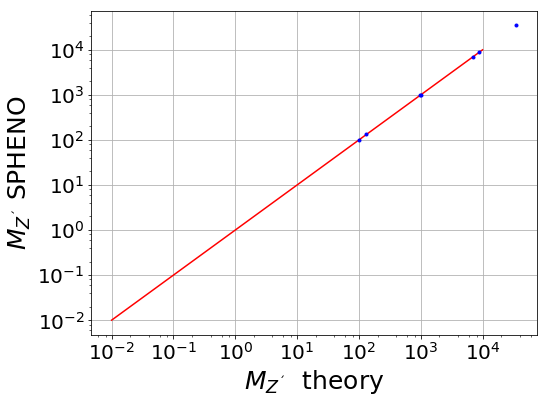

In [8]:
plt.figure(figsize=(8,6))

a = np.linspace(1e-2,1e+4,5)
plt.plot(a,a,'r-')

plt.loglog(5.*xd.g1p*xd.vx,xd.MZp,'b.')

plt.xlabel(r'$M_{Z^{´}}$  theory',size=25)
plt.ylabel(r'$M_{Z^{´}}$ SPHENO',size=25)

plt.grid()

plt.tight_layout()

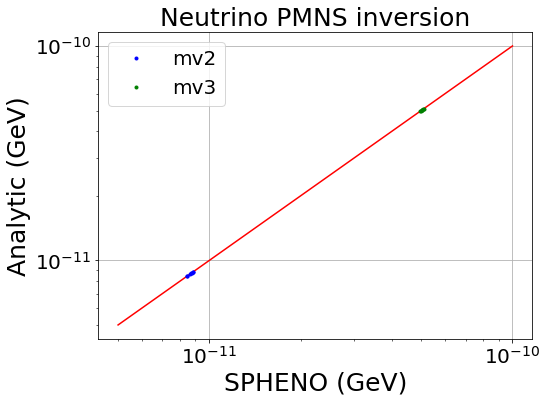

In [9]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,xd.mv2,'b.')
plt.loglog(xd.mnu3,xd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPHENO (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')

# Direct and indirec detection

In [10]:
from indirectdirect import *

In [11]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

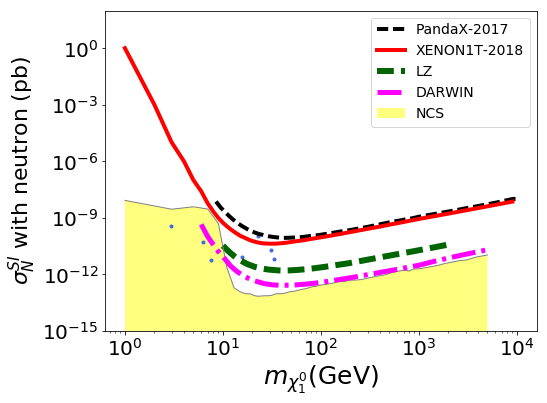

In [12]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=6,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=5,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')

#plt.xlim(yd.mchi.min(),1.0e4)
plt.ylim(1e-15,1e2)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

In [13]:
### Anality SI cross-section

### Anality SI cross-section

In [14]:
#Parameters
fN = 0.25
v = 244.868782
vev = 244.868782
#nucleon mass in GeV (proton and neutron mass)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000
#MW      = 80.385
#MZ      = 91.187

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

\begin{align}
\sigma^{SI}_{\chi N}= \dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{g_B^4}{M_{Z'}^4}B^2
\end{align}

https://arxiv.org/pdf/1409.8165.pdf

In [15]:
xd['mr'] = MNn*xd.mchi/(MNn+xd.mchi)

In [16]:
xd['SIZp_vector'] = (1./(4*np.pi))*xd.mr**2*(xd.g1p**4/xd.MZp**4)*(-2+3)**2*GeVtomin2topb

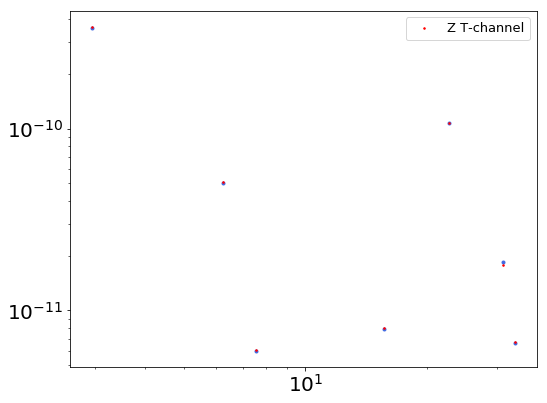

In [17]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(xd.mchi, 2.8*xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z T-channel')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.legend(prop={'size':13},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

$\sigma_{SD}$

In [28]:
from scipy import interpolate

#LZ-1802.06039
names3 = ['MDM', 'LZSD']
lz = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SD-neutron-prosp-2018.csv',names=names3, header=None)
LZSD=interpolate.interp1d(lz.MDM,lz.LZSD)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SD.csv', names=names1, header=None)
DARSD=interpolate.interp1d(dd1.MDM,dd1.DAR)

#XENON SD 2019
names2 = ['MDM', 'XENON1TSD']
xeSD=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/SD-2019/neutron.csv',names=names2, header=None)
XENON1TSD=interpolate.interp1d(xeSD.MDM,xeSD.XENON1TSD)

#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX  neutrons 1705.03380
names4 = ['M', 'sigmaSD']
luxSD = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX-SD-neutron-2017.csv',names=names4, header=None)
LUX_SD_n = interpolate.interp1d(luxSD.M, luxSD.sigmaSD)

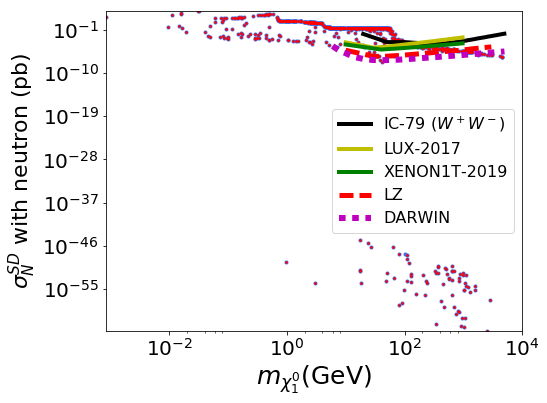

In [29]:
plt.figure(figsize=(8,6))
#For neutrons
plt.loglog(xd.mchi,xd['SDN'], color='royalblue', marker='o',ms=3,linestyle='',label='')
#good neutrino reconstruction masses
plt.loglog(yd.mchi,yd['SDN'], color='red', marker='.',ms=3,linestyle='',label='')

#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=4,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
n=np.arange(10,990,20)
plt.plot(n,LUX_SD_n(n),'y',lw=4,label='LUX-2017')

#XENON1T
nx=np.arange(10,990,30)
plt.loglog(nx,XENON1TSD(nx)*1e+36,'g-',lw=4,label='XENON1T-2019')
#LZ-1802.06039
nn=np.arange(10,3000,20)
plt.loglog(nn,LZSD(nn)*1e+36,'r--',lw=5,label='LZ')

# DARWIN SD
n=np.arange(6,5000)
plt.loglog(n,DARSD(n)*1e+36,'m:',lw=6,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SD}$ with neutron (pb)',size=22)
plt.legend(prop={'size':16},loc='best')
plt.xlim(xd.mchi.min(),1.0e4)
plt.ylim(xd.SDN.min(),xd.SDN.max())

plt.tight_layout()
#plt.savefig('plots/SD.pdf')
#plt.show()

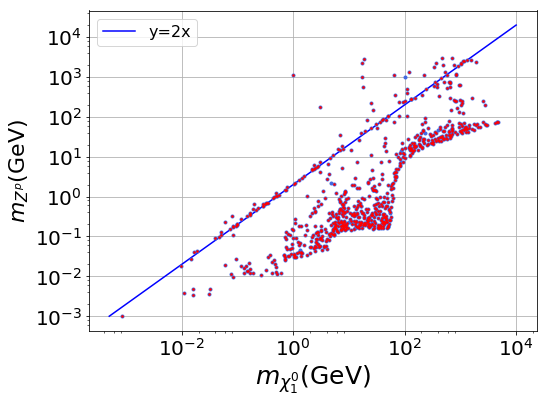

In [30]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-4,1e+4,5)
plt.plot(a,2*a,'b-',label='y=2x')

plt.loglog(xd.mchi,xd.MZp, color='royalblue', marker='o',ms=3,linestyle='',label='')
#good neutrino masses reconstruction
plt.loglog(yd.mchi,yd.MZp, color='red', marker='.',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$m_{Z^p}$(GeV)',size=22)
plt.legend(prop={'size':16},loc='best')
#plt.xlim(9,2.0e3)
#plt.ylim(1e-20,2e-1)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_vs_mZp.pdf')
plt.show()

# $a_{\mu}=\dfrac{(g-2)\tau}{2}=116592040(54)\times 10^{-11}$ Fermilab

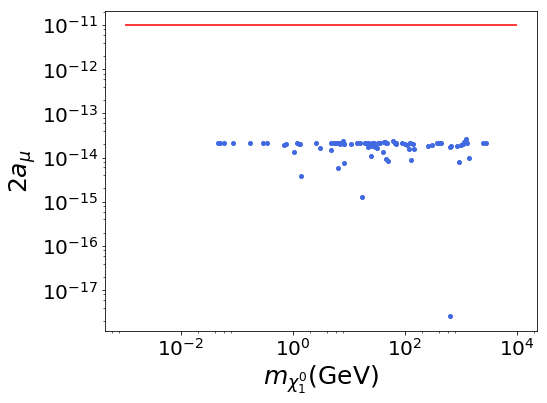

In [56]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.g2mu, color='royalblue', marker='o',ms=4,linestyle='',label='')

plt.hlines(1e-11,1e-3,1e4,'r')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$2 a_{\mu}$',size=25)
#plt.legend(prop={'size':16},loc='lower left')

plt.tight_layout()
plt.show()

# STU parameters

## $\sigma v$ today

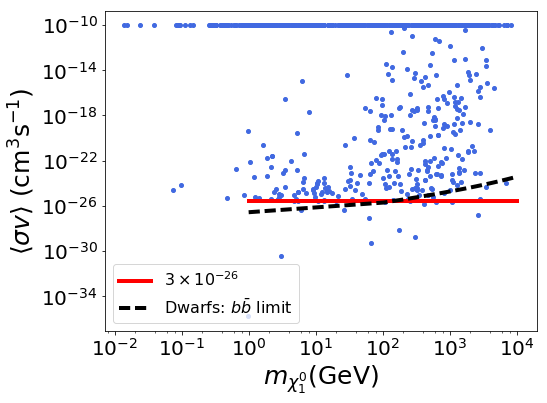

In [139]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.sv, color='royalblue', marker='o',ms=4,linestyle='',label='')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=4,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':16},loc='lower left')
#plt.xlim(9,2e3)
#plt.ylim(1e-36,1e-24)

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
#plt.show()

# 